In [ ]:
from __future__ import absolute_import, division, print_function
from tqdm import tqdm
from numpy.random import randn

import pathlib
import random
import matplotlib.pyplot as plt

import tensorflow as tf
import numpy as np

from matplotlib.image import imread
from keras.preprocessing import image
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

AUTOTUNE = tf.data.experimental.AUTOTUNE


In [ ]:
IMG_SIZE=(224, 224)
IMG_SHAPE = (224,224,3)
BATCH_SIZE = 80

train_ds = tf.keras.utils.image_dataset_from_directory('/content/drive/Othercomputers/Mylaptop/tensorflow_Dataset_first/train',
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)
validation_ds = tf.keras.utils.image_dataset_from_directory('/content/drive/Othercomputers/Mylaptop/tensorflow_Dataset_first/validation',
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

Found 9746 files belonging to 10 classes.
Found 3231 files belonging to 10 classes.


In [ ]:
class_names = train_ds.class_names
class_names

['african_crocodile',
 'african_elephant',
 'bald_eagle',
 'bison',
 'giant_panda',
 'hippopotamus',
 'lion',
 'tiger',
 'tree_frog',
 'zebra']

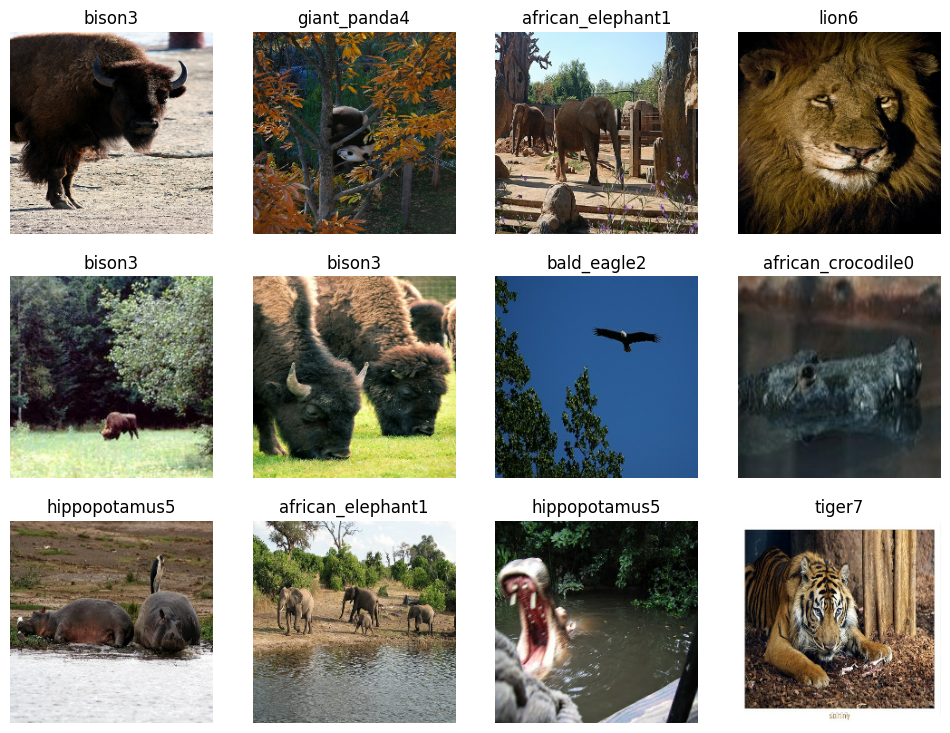

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 9))
for images, labels in train_ds.take(1):
  for i in range(12):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    tittle = str(class_names[labels[i]]) + str(labels[i].numpy())
    plt.title(tittle)
    plt.axis("off")


In [ ]:
train_dataset = train_ds.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_ds.prefetch(buffer_size=AUTOTUNE)

In [ ]:
VGG16_MODEL=tf.keras.applications.VGG16(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
VGG16_MODEL.trainable=False
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(len(class_names),activation='softmax')

In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])
# rescale = tf.keras.layers.Rescaling(1./127.5, offset=-1)

In [ ]:
model = tf.keras.Sequential()
model.add( tf.keras.layers.Rescaling(1./127.5, offset=-1))
model.add(data_augmentation)
for layer in VGG16_MODEL.layers:
  model.add(layer)
model.add(global_average_layer)
model.add(prediction_layer)

In [ ]:
model.compile(optimizer= tf.optimizers.Adam(learning_rate=0.001 ),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=["accuracy"])

In [ ]:
history = model.fit(train_ds,
                    epochs=30,
                    validation_data=validation_ds)

In [ ]:
model.save('/content/drive/Othercomputers/Mylaptop/ACE_TCAV/ace/vgg16_animal_3_june.h5')

# Test model

In [ ]:
from tensorflow import keras
# !cp -av /content/drive/Othercomputers/Mylaptop/ACE_TCAV/ace/vgg.h5 /content/vgg.h5
model_to_test = keras.models.load_model('/content/drive/Othercomputers/Mylaptop/ACE_TCAV/ace/vgg16_animal_3_june.h5')
# klasa = 'tiger'
animals = ['tree_frog', 'zebra']#['african_elephant', 'giant_panda',  'lion', 'bison',	'bald_eagle',  'tree_frog',  'african_crocodile', 	'hippopotamus', 'tiger', 'zebra']
animals_index = [8, 9 ]#[1, 4, 6, 3, 2, 8, 0, 5, 7, 9]
# clas_number = 7

In [ ]:
#test model on zebra class]
import os
import shutil
for klasa, clas_number in zip(animals, animals_index):
  scores = {}
  for file in os.listdir('/content/drive/Othercomputers/Mylaptop/tensorflow_Dataset_first/test/' + klasa):
    img = tf.keras.utils.load_img('/content/drive/Othercomputers/Mylaptop/tensorflow_Dataset_first/test/'+klasa+'/' + file, target_size=(224, 224)
    )
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch
    predictions = model_to_test.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    if np.argmax(score) == clas_number:
      scores[file] = max(score)
      print(score)
  sorted_scores = {k: v for k, v in sorted(scores.items(), key=lambda item: item[1])}
  dst = '/content/drive/MyDrive/MG/work_space/TCAV_ACE/workspace/source_dir/'+klasa
  # os.mkdir(dst)
  for file in list(sorted_scores.keys())[-20:]:
    src = "/content/drive/Othercomputers/Mylaptop/tensorflow_Dataset_first/test/"+klasa+"/"+str(file)
    shutil.copy(src, dst)



1/1 [==============================] - 0s 203ms/step
tf.Tensor(
[0.08533674 0.08533674 0.08533674 0.08533674 0.08533674 0.08533674
 0.08533674 0.08533674 0.2319693  0.08533674], shape=(10,), dtype=float32)
1/1 [==============================] - 0s 19ms/step
tf.Tensor(
[0.08533677 0.08533675 0.08533675 0.08533675 0.08533675 0.08533675
 0.08533675 0.08533675 0.23196927 0.08533675], shape=(10,), dtype=float32)
1/1 [==============================] - 0s 21ms/step
tf.Tensor(
[0.08533674 0.08533674 0.08533674 0.08533674 0.08533674 0.08533674
 0.08533674 0.08533674 0.2319693  0.08533674], shape=(10,), dtype=float32)
1/1 [==============================] - 0s 19ms/step
tf.Tensor(
[0.08533674 0.08533674 0.08533674 0.08533674 0.08533674 0.08533674
 0.08533674 0.08533674 0.2319693  0.08533674], shape=(10,), dtype=float32)
1/1 [==============================] - 0s 18ms/step
tf.Tensor(
[0.08535466 0.08535038 0.08535042 0.08535038 0.08535038 0.08543883
 0.08535074 0.08535039 0.23175347 0.08535038], sh

IsADirectoryError: ignored

In [ ]:
sorted_scores = {k: v for k, v in sorted(scores.items(), key=lambda item: item[1])}

In [ ]:
sorted_scores

In [ ]:
list(sorted_scores.keys())[-20:]

In [ ]:
print(predictions)

In [ ]:
model.summary()

In [ ]:
model.save('/content/drive/Othercomputers/Mylaptop/ACE_TCAV/ace/vgg16_all.h5')

In [ ]:

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
model.save('saved_model/my_model_vgg')

In [ ]:
model.save('my_model.h5')

In [ ]:
!zip -r /content/model_vgg.zip /content/saved_model/my_model_vgg